# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the codes provided.

In [4]:
class LinearRegression:
    def __init__(self, learnr, epoch):
        self.lr=learnr
        self.epoch=epoch

    def fit(self, X_train, y_train):
        samp_siz, n_features = X_train.shape
        y_train=y_train.reshape(-1,1)

        self.weight = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))


        for i in range(self.epoch):
            delta= -(y_train-np.dot(X_train,self.weight)-self.bias)/samp_siz
            dw= np.dot(X_train.T,delta)
            db= np.sum(delta).reshape(1,1)

            #update weight and biases
            self.weight-= self.lr * dw
            self.bias-= self.lr* db

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weight)+self.bias
        print(self.weight, self.bias)
        return y_predicted

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


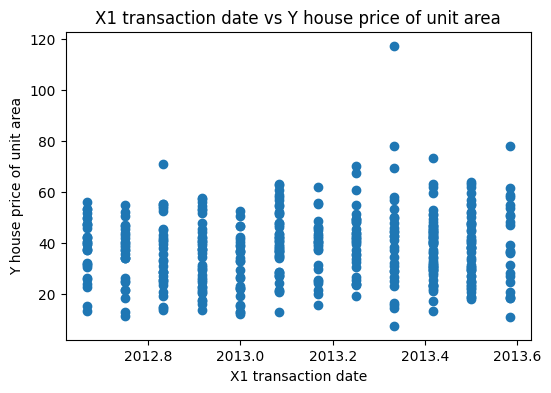

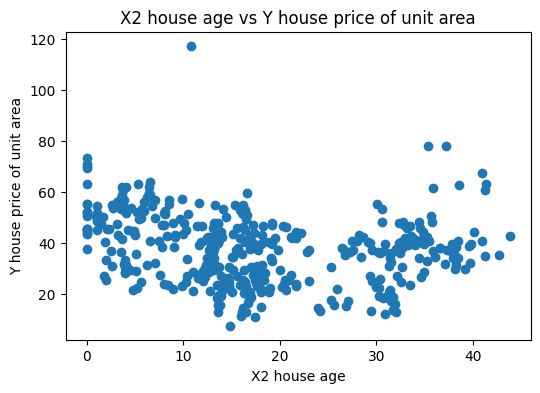

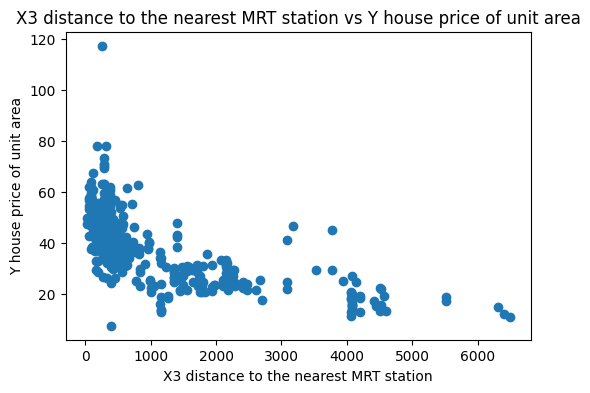

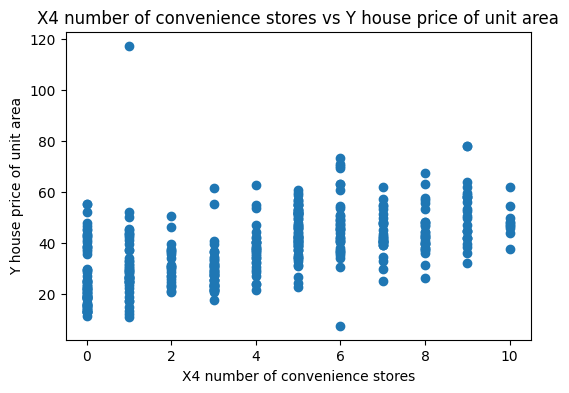

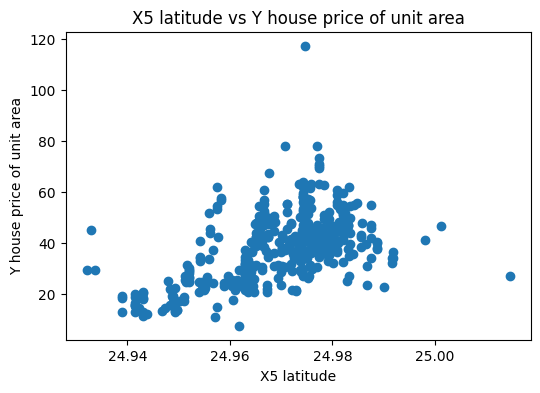

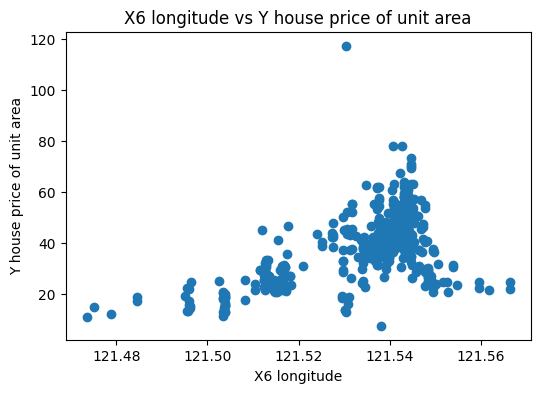

[[  4.67350509]
 [-12.02519524]
 [-26.10000211]
 [ 11.82443153]
 [ 16.54756956]
 [ -0.95637847]] [[31.63079498]]
Comparison:
Custom Linear Regression MSE: 50.2336, R2: 0.6475
Sklearn Linear Regression MSE: 50.2336, R2: 0.6475


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

df = pd.read_csv('sample_data/Real estate.csv')
print(df.isnull().sum())

cols = df.columns
target = cols[-1]


for col in cols[1:-1]:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[col], df[target])
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f'{col} vs {target}')
    plt.show()

df = df.drop(columns=['No'])

X = df.drop(columns=[target])
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


custom_model = LinearRegression(learnr=0.2, epoch=100000)
custom_model.fit(X_train_scaled, y_train)
y_pred_custom = custom_model.predict(X_test_scaled)


mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)


sk_model = SklearnLinearRegression()
sk_model.fit(X_train_scaled, y_train)
y_pred_sk = sk_model.predict(X_test_scaled)


mse_sk = mean_squared_error(y_test, y_pred_sk)
r2_sk = r2_score(y_test, y_pred_sk)


print("Comparison:")
print(f"Custom Linear Regression MSE: {mse_custom:.4f}, R2: {r2_custom:.4f}")
print(f"Sklearn Linear Regression MSE: {mse_sk:.4f}, R2: {r2_sk:.4f}")


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = load_breast_cancer()

X = data.data
y = data.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")



X_train shape: (455, 30), X_test shape: (114, 30)
y_train shape: (455,), y_test shape: (114,)


5. Write code for the sigmoid function and Logistic regression.


In [26]:
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)


class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):

        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)


        self.weights = np.random.randn(n_features, 1) / np.sqrt(n_features)
        self.bias = np.random.randn(1, 1)


        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)


            dw = -np.dot(X.T, (y - y_pred)) / n_samples
            db = -np.sum(y - y_pred) / n_samples


            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):

        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return (y_pred >= 0.5).astype(int)


6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score


data = load_breast_cancer()
X = data.data
y = data.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


custom_model = LogisticRegression(learning_rate=0.1, epochs=2000)
custom_model.fit(X_train, y_train)
y_pred_custom = custom_model.predict(X_test)
acc_custom = accuracy_score(y_test, y_pred_custom)
print(f"Custom Logistic Regression Accuracy: {acc_custom:.4f}")

penalties = ['none', 'l2', 'l1', 'elasticnet']

for penalty in penalties:
    try:
        if penalty == 'none':
            model = SklearnLogisticRegression(penalty=penalty, solver='lbfgs', max_iter=10000)
        elif penalty in ['l1', 'elasticnet']:
            model = SklearnLogisticRegression(
                penalty=penalty,
                solver='saga',
                l1_ratio=0.5 if penalty == 'elasticnet' else None,
                max_iter=10000
            )
        else:
            model = SklearnLogisticRegression(penalty=penalty, solver='lbfgs', max_iter=10000)

        model.fit(X_train, y_train)
        y_pred_sk = model.predict(X_test)
        acc_sk = accuracy_score(y_test, y_pred_sk)
        print(f"Sklearn Logistic Regression with penalty='{penalty}' Accuracy: {acc_sk:.4f}")

    except Exception as e:
        print(f"Could not fit sklearn Logistic Regression with penalty='{penalty}': {e}")


Custom Logistic Regression Accuracy: 0.9561
Could not fit sklearn Logistic Regression with penalty='none': The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.
Sklearn Logistic Regression with penalty='l2' Accuracy: 0.9825
Sklearn Logistic Regression with penalty='l1' Accuracy: 0.9561
Sklearn Logistic Regression with penalty='elasticnet' Accuracy: 0.9825


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [28]:
from sklearn.metrics import classification_report, confusion_matrix


penalties = ['none', 'l2', 'l1', 'elasticnet']
sk_results = {}

for penalty in penalties:
    try:
        if penalty == 'none':
            model = SklearnLogisticRegression(penalty=penalty, solver='lbfgs', max_iter=10000)
        elif penalty in ['l1', 'elasticnet']:
            model = SklearnLogisticRegression(
                penalty=penalty,
                solver='saga',
                l1_ratio=0.5 if penalty == 'elasticnet' else None,
                max_iter=10000
            )
        else:
            model = SklearnLogisticRegression(penalty=penalty, solver='lbfgs', max_iter=10000)

        model.fit(X_train, y_train)
        y_pred_sk = model.predict(X_test)
        acc_sk = accuracy_score(y_test, y_pred_sk)
        sk_results[penalty] = (acc_sk, model, y_pred_sk)

        print(f"Sklearn Logistic Regression with penalty='{penalty}' Accuracy: {acc_sk:.4f}")

    except Exception as e:
        print(f"Could not fit sklearn Logistic Regression with penalty='{penalty}': {e}")


print("\n--- Custom Logistic Regression Classification Report ---")
print(classification_report(y_test, y_pred_custom))

print("\n--- Custom Logistic Regression Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred_custom))


best_penalty = max(sk_results, key=lambda k: sk_results[k][0])
best_acc, best_model, best_pred = sk_results[best_penalty]

print(f"\nBest Sklearn Logistic Regression penalty: '{best_penalty}' with Accuracy: {best_acc:.4f}")

print("\n--- Best Sklearn Logistic Regression Classification Report ---")
print(classification_report(y_test, best_pred))

print("\n--- Best Sklearn Logistic Regression Confusion Matrix ---")
print(confusion_matrix(y_test, best_pred))


Could not fit sklearn Logistic Regression with penalty='none': The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l2', 'l1'} or None. Got 'none' instead.
Sklearn Logistic Regression with penalty='l2' Accuracy: 0.9825
Sklearn Logistic Regression with penalty='l1' Accuracy: 0.9561
Sklearn Logistic Regression with penalty='elasticnet' Accuracy: 0.9825

--- Custom Logistic Regression Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


--- Custom Logistic Regression Confusion Matrix ---
[[39  4]
 [ 1 70]]

Best Sklearn Logistic Regression penalty: 'l2' with Accuracy: 0.9825

--- Best Sklearn Logistic Regression Classification Report ---
              precision    

# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('sample_data/glass.csv')


print(df.head())


X = df.drop(columns=['Type'])
y = df['Type']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
Training samples: 160, Testing samples: 54


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [34]:
import numpy as np
from collections import Counter


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        predictions = [self._predict_one(x) for x in x_test]
        return np.array(predictions)

    def _predict_one(self, x):
        distances = [euclidean_distance(x, x_train_point) for x_train_point in self.x_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]

def accuracy(predictions, y_test):
    return np.sum(predictions == y_test) / len(y_test)

X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)


knn = KNN(k=3)
knn.fit(X_train_np, y_train_np)


y_pred = knn.predict(X_test_np)


acc = accuracy(y_pred, y_test_np)
print(f"KNN Accuracy with k=3: {acc:.4f}")


KNN Accuracy with k=3: 0.7037


7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [36]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        predictions = [self._predict_one(x) for x in x_test]
        return np.array(predictions)

    def _predict_one(self, x):
        distances = [euclidean_distance(x, x_train_point) for x_train_point in self.x_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]


print("Custom KNN Accuracy for different k values:")
for k in [1, 3, 5, 7]:
    custom_knn = KNN(k=k)
    custom_knn.fit(X_train_np, y_train_np)
    y_pred_custom = custom_knn.predict(X_test_np)
    acc_custom = accuracy_score(y_test_np, y_pred_custom)
    print(f"k={k}: Accuracy = {acc_custom:.4f}")


print("\nSklearn KNeighborsClassifier Accuracy for different k values:")
for k in [1, 3, 5, 7]:
    skl_knn = KNeighborsClassifier(n_neighbors=k)
    skl_knn.fit(X_train_np, y_train_np)
    y_pred_skl = skl_knn.predict(X_test_np)
    acc_skl = accuracy_score(y_test_np, y_pred_skl)
    print(f"k={k}: Accuracy = {acc_skl:.4f}")


Custom KNN Accuracy for different k values:
k=1: Accuracy = 0.6852
k=3: Accuracy = 0.7037
k=5: Accuracy = 0.7222
k=7: Accuracy = 0.7222

Sklearn KNeighborsClassifier Accuracy for different k values:
k=1: Accuracy = 0.6852
k=3: Accuracy = 0.7222
k=5: Accuracy = 0.7222
k=7: Accuracy = 0.7037
